In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


In [2]:
#read csv
df=pd.read_csv('final_data.csv')
df1 = df[df['Release Year'] >= 1995]
df1 = df1[df1['Release Year'] <= 2015]
df1.rename(columns ={'Countent Rating':'Content Rating'}, inplace=True)


In [3]:
df1.columns

Index(['Unnamed: 0', 'Colouring', 'Director', 'Critic Review Count',
       'Duration', 'Director Facebook Likes', 'Actor 3 Facebook Likes',
       'Actor 2', 'Actor 1 Facebook Likes', 'Gross', 'Genres', 'Actor 1',
       'Title', 'IMDb Votes', 'Cast Facebook Likes', 'Actor 3',
       'Poster Facenumber', 'Plot Keywords', 'IMDb Link', 'User Review Count',
       'Language', 'Country', 'Content Rating', 'Budget',
       'Actor 2 Facebook Likes', 'IMDb Score', 'Aspect Ratio',
       'Facebook Likes', 'IMDb ID', 'id', 'Popularity', 'Revenue', 'Cast',
       'Homepage', 'Tagline', 'Overview', 'Runtime', 'Production Companies',
       'Release Date', 'Vote Count', 'Average Vote', 'Release Year',
       'Adjusted Budget', 'Adjusted Revenue'],
      dtype='object')

In [4]:
#select columns
df2=df1[[ 'Gross', 'Genres', 'Title', 'Plot Keywords', 'Country', 'Content Rating', 'Budget', 'IMDb Score', 'Aspect Ratio', 'Revenue', 'Cast',
        'Runtime', 'Production Companies', 'Release Year', 'Adjusted Budget', 'Adjusted Revenue']]

#replace 0 w nan
df2['Adjusted Revenue'].replace(0, np.nan, inplace=True)

#drop nan
df2_1=df2.dropna(axis=0,how='any')

C:\Users\floPe\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
#group by country by yr
df3=df2_1.groupby(['Country','Release Year'])['Adjusted Revenue'].mean()
# Convert to DataFrame
mean_df=pd.DataFrame(df3)
# Preview DataFrame
df4=mean_df


In [6]:
df4.index.levels[0].values

array(['Australia', 'Belgium', 'Canada', 'Chile', 'China',
       'Czech Republic', 'Denmark', 'France', 'Georgia', 'Germany',
       'Hong Kong', 'Hungary', 'Ireland', 'Italy', 'Japan', 'New Zealand',
       'Official site', 'Romania', 'Russia', 'South Africa',
       'South Korea', 'Spain', 'UK', 'USA'], dtype=object)

In [7]:
df4 = df4.reset_index()

In [8]:
df4["Adjusted Revenue"] = df4["Adjusted Revenue"]/1000000
df5=df4

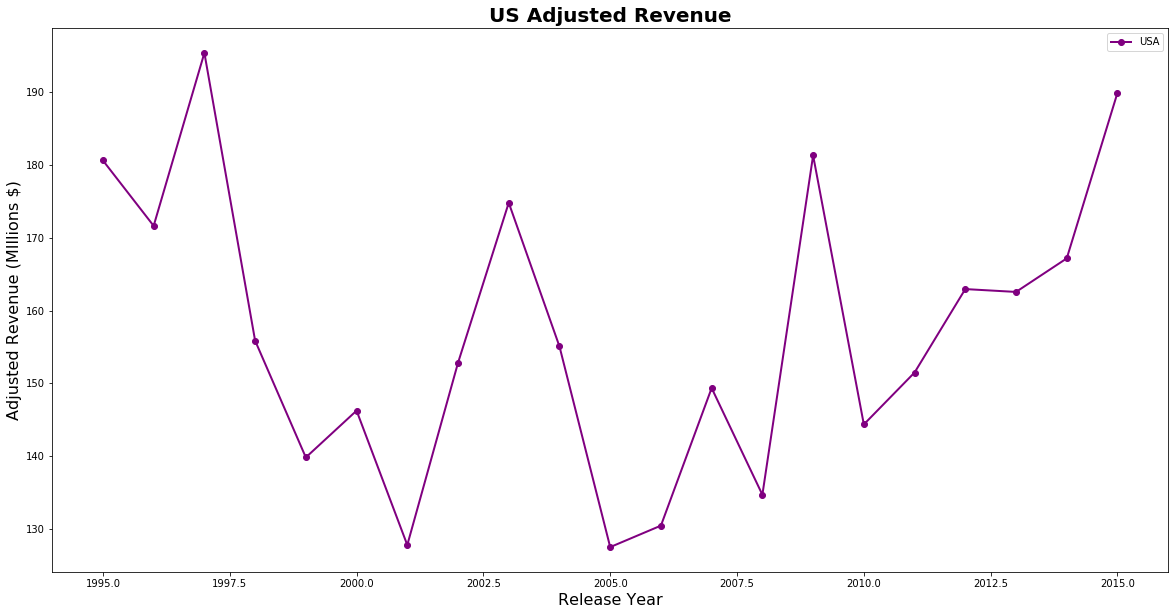

In [9]:
subDF = df5.loc[df5.Country == "USA"]


plt.figure(figsize=(20,10))


plt.plot(subDF["Release Year"], subDF["Adjusted Revenue"], color="purple", label="USA", lw=2, marker='o')




plt.legend(loc="best")
#plt.grid(color="lightgrey")

plt.title("US Adjusted Revenue", weight="bold", fontsize=20)
plt.xlabel("Release Year", fontsize=16)
plt.ylabel("Adjusted Revenue (MIllions $)", fontsize=16)
plt.savefig('US Adjusted Revenue.png')

plt.show()

In [10]:
#percent change per yr
pctchange1=subDF['Adjusted Revenue'].pct_change() 
pctchange1df=pd.DataFrame(pctchange1)
pctchange1df.columns=['Percent Change']
pctchange1df['Percent Change'] = pctchange1df['Percent Change']*100
pctchange1df


,Percent Change
119,NaN
120,-4.968375
121,13.827848
122,-20.211754
123,-10.281337
124,4.591013
125,-12.606084
126,19.556858
127,14.373294
128,-11.280350


In [11]:
#new data csv 
#read new csv
bom=pd.read_csv("BOM.csv")
bom.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avengers: Endgame,BV,857190335,2019
2,3,Avatar,Fox,760507625,2009
3,4,Black Panther,BV,700059566,2018
4,5,Avengers: Infinity War,BV,678815482,2018


In [12]:
#limit to yr 1995 to 2015
bom= bom[bom['year'] >= 1995]
bom1= bom[bom['year'] <= 2015]

In [13]:
#group by yr and get mean per yr
bom2=bom1.groupby(['year'])['lifetime_gross'].mean()
#new dataframe of group by  
newdf=pd.DataFrame(bom2)

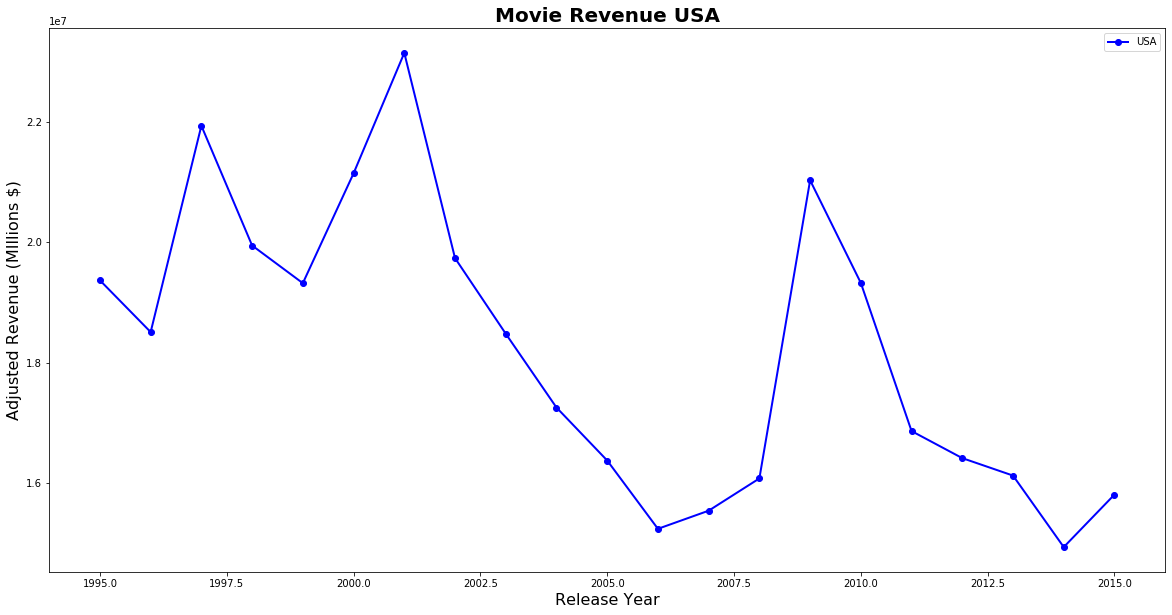

In [14]:
#plot new df
subdf2=newdf

plt.figure(figsize=(20,10))

plt.plot(subdf2.index, subdf2["lifetime_gross"], color="blue", label="USA", lw=2, marker='o')
plt.legend(loc="best")
#plt.grid(color="lightgrey")

plt.title("Movie Revenue USA", weight="bold", fontsize=20)
plt.xlabel("Release Year", fontsize=16)
plt.ylabel("Adjusted Revenue (MIllions $)", fontsize=16)
plt.savefig('Movie Revenue USA.png')

plt.show()

In [15]:
#percent change new df

pctchange2=newdf.pct_change() 
pctchange2.reset_index()
pctchange2.columns=['Percent Change']
pctchange2['Percent Change'] = pctchange2['Percent Change']*100
pctchange2.index

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='year')

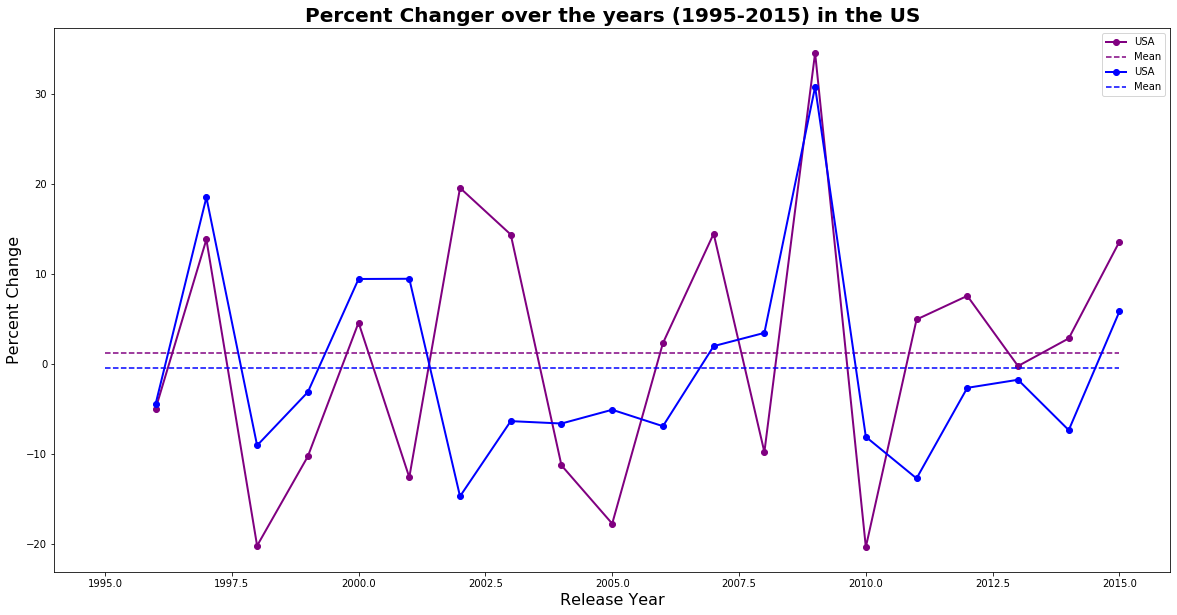

In [16]:

pctsubDF = pctchange1df
pctsubDF2=pctchange2


plt.figure(figsize=(20,10))
x=pctchange2.index

plt.plot(pctchange2.index, pctsubDF['Percent Change'], color="purple", label="USA", lw=2, marker='o')
y_mean = [np.mean(pctsubDF['Percent Change'])]*len(x)

plt.plot(x,y_mean, label='Mean', linestyle='--', color="purple")

plt.plot(pctchange2.index, pctsubDF2['Percent Change'], color="Blue", label="USA", lw=2, marker='o')
y_mean2 = [np.mean(pctsubDF2['Percent Change'])]*len(x)
plt.plot(x,y_mean2, label='Mean', linestyle='--', color="Blue")
plt.legend(loc="best")

plt.title("Percent Changer over the years (1995-2015) in the US", weight="bold", fontsize=20)
plt.xlabel("Release Year", fontsize=16)
plt.ylabel("Percent Change", fontsize=16)
plt.savefig('Percent Change.png')

In [17]:
## p value< .05 they are not the same
## p value> .05 data is not not the same
from scipy.stats import ttest_ind

cat1 = subDF
cat2 = newdf

ttest_ind(cat1["Adjusted Revenue"], cat2['lifetime_gross'])

Ttest_indResult(statistic=-34.87137194448279, pvalue=1.4662380629909464e-31)

In [18]:
dfcontentrev=df2_1[['Content Rating','Adjusted Revenue','Release Year']]
dfcontentrev2=dfcontentrev.groupby(['Content Rating'])['Adjusted Revenue'].mean()
dfcontratingdf=pd.DataFrame(dfcontentrev2)
sub9=dfcontratingdf
sub9=sub9.reset_index()
sub9.columns='Content Rating', 'Average Revenue'
sub9

,Content Rating,Average Revenue
0,G,2.853480e+08
1,NC-17,2.313673e+07
2,Not Rated,4.706433e+05
3,PG,2.156556e+08
4,PG-13,1.875870e+08
5,R,8.662109e+07
6,Unrated,7.223160e+06


In [19]:
sub9["Average Revenue"]=sub9["Average Revenue"]
sub9

,Content Rating,Average Revenue
0,G,2.853480e+08
1,NC-17,2.313673e+07
2,Not Rated,4.706433e+05
3,PG,2.156556e+08
4,PG-13,1.875870e+08
5,R,8.662109e+07
6,Unrated,7.223160e+06


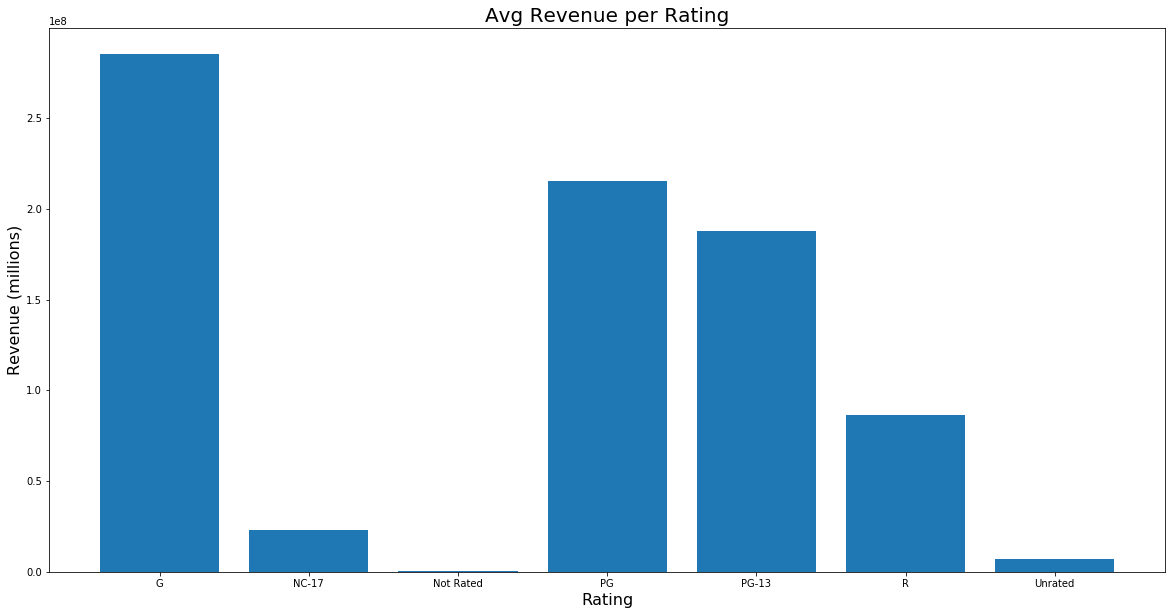

In [22]:
plt.figure(figsize=(20,10))
plt.bar(sub9['Content Rating'],sub9["Average Revenue"])
plt.xlabel("Rating", fontsize=16)
plt.ylabel("Revenue (millions)", fontsize=16)
plt.title('Avg Revenue per Rating',fontsize=20)
plt.savefig('Avg_Revenue per Rating.png')

